# 先定义一个评分矩阵

In [1]:
import numpy as np
R = np.array([
         [5,2,0,0,1],
         [1,0,3,0,2],
         [0,3,5,3,0],
         [1,1,1,0,0],
         [0,3,4,0,0],
])
R

array([[5, 2, 0, 0, 1],
       [1, 0, 3, 0, 2],
       [0, 3, 5, 3, 0],
       [1, 1, 1, 0, 0],
       [0, 3, 4, 0, 0]])

# 我们的任务就是把这个评分矩阵，给分解成两个小矩阵， R = PQ

In [29]:
# 定义一个lfm函数

# R: 评分矩阵
# K：特征维度
# alpha： 学习率
# lanbda： 正则化系数
# epoch: 梯度下降的次数

def lfm(R,K,alpha,lanbda,epoch):
    M = R.shape[0]
    N = R.shape[1]
    
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)
    
    loss_arr = []
    
    for step in range(epoch):
        # 写梯度下降的方法
        for u in range(M):
            for i in range(N):

                if R[u][i] > 0: #有评分的时候，才进行迭代

                    # 先算出（）里面的
                    eui = np.dot(P[u,:],Q[:,i]) - R[u][i]

                    for k in range(K):
                        P[u,k] = P[u,k] - alpha * (eui * Q[k][i])
                        Q[k,i] = Q[k,i] - alpha * (eui * P[u][k])
        
        # 让我们来计算loss
        loss = 0 
        for u in range(M):
            for i in  range(N):
                if R[u][i] > 0 :
                    loss += (np.dot(P[u,:],Q[:,i])-R[u][i])**2
        
        if(step % 3 == 0):
            print("step=",step,",loss=",loss)
        loss_arr.append(loss)
            
    return P,Q,loss_arr

In [30]:
K = 2
alpha = 0.01
lanbda = 0.2
epoch = 1000

P,Q,loss_arr = lfm(R,K,alpha,lanbda,epoch)

step= 0 ,loss= 89.69736432238639
step= 3 ,loss= 76.97801810560361
step= 6 ,loss= 62.412229717667046
step= 9 ,loss= 47.126171111482584
step= 12 ,loss= 33.08262570291139
step= 15 ,loss= 22.050444489962704
step= 18 ,loss= 14.606005494192285
step= 21 ,loss= 10.137139182086585
step= 24 ,loss= 7.605774755542006
step= 27 ,loss= 6.159409895401741
step= 30 ,loss= 5.280718969470162
step= 33 ,loss= 4.699618512486768
step= 36 ,loss= 4.282122255830442
step= 39 ,loss= 3.9603535297222945
step= 42 ,loss= 3.697705952806455
step= 45 ,loss= 3.4730117323880965
step= 48 ,loss= 3.273383341359534
step= 51 ,loss= 3.0907835881964005
step= 54 ,loss= 2.920216655237524
step= 57 ,loss= 2.7586720006834295
step= 60 ,loss= 2.6044546096977266
step= 63 ,loss= 2.4567352362164345
step= 66 ,loss= 2.315237187933368
step= 69 ,loss= 2.180013539156749
step= 72 ,loss= 2.051287387101596
step= 75 ,loss= 1.929338100660243
step= 78 ,loss= 1.8144225143823627
step= 81 ,loss= 1.7067235189185745
step= 84 ,loss= 1.606320466906447
step=

step= 816 ,loss= 0.2194322660243833
step= 819 ,loss= 0.21924848743465317
step= 822 ,loss= 0.21906207858996476
step= 825 ,loss= 0.2188730108744668
step= 828 ,loss= 0.21868125569402258
step= 831 ,loss= 0.21848678448774678
step= 834 ,loss= 0.21828956873990216
step= 837 ,loss= 0.21808957999215065
step= 840 ,loss= 0.21788678985617435
step= 843 ,loss= 0.21768117002665907
step= 846 ,loss= 0.21747269229464894
step= 849 ,loss= 0.21726132856126532
step= 852 ,loss= 0.21704705085180226
step= 855 ,loss= 0.21682983133018946
step= 858 ,loss= 0.2166096423138336
step= 861 ,loss= 0.21638645628882533
step= 864 ,loss= 0.21616024592552627
step= 867 ,loss= 0.2159309840945246
step= 870 ,loss= 0.2156986438829619
step= 873 ,loss= 0.21546319861123284
step= 876 ,loss= 0.21522462185005048
step= 879 ,loss= 0.21498288743787755
step= 882 ,loss= 0.2147379694987236
step= 885 ,loss= 0.21448984246029643
step= 888 ,loss= 0.214238481072514
step= 891 ,loss= 0.21398386042636405
step= 894 ,loss= 0.21372595597311045
step= 897

In [18]:
print(R)
print(np.dot(P,Q))

[[5 2 0 0 1]
 [1 0 3 0 2]
 [0 3 5 3 0]
 [1 1 1 0 0]
 [0 3 4 0 0]]
[[4.98914153 2.02702846 1.97099958 1.25282615 0.99547362]
 [0.99333778 1.5674229  3.0094646  1.7984505  1.99616204]
 [3.73105062 3.06647439 4.9606772  3.00066538 3.13988647]
 [1.05946452 0.73881151 1.11194298 0.6764589  0.68776929]
 [5.19038546 2.98000477 4.00953106 2.46290037 2.3815232 ]]


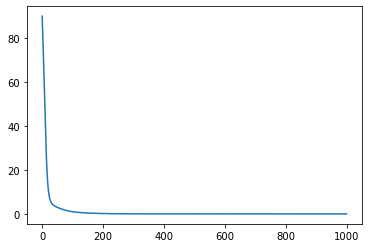

In [31]:
# 打印一下loss下降
x = np.arange(epoch)
y = loss_arr
import matplotlib.pyplot as plt
plt.plot(x,y)